In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, precision_recall_curve, auc

In [2]:
# Load each excel sheet as a pandas dataframe

ampep = pd.read_excel("data/Base de datos-RiPPs-AMP.xlsx", sheet_name='AmPEP(222)', header=1)
macrel = pd.read_excel("data/Base de datos-RiPPs-AMP.xlsx", sheet_name='Macrel (233)', header=1)
campr3 = pd.read_excel("data/Base de datos-RiPPs-AMP.xlsx", sheet_name='CAMPR3 (192)', header=1)
ampscanner = pd.read_excel("data/Base de datos-RiPPs-AMP.xlsx", sheet_name='AMP Scanner (85)', header=1)
al4amp = pd.read_excel("data/Base de datos-RiPPs-AMP.xlsx", sheet_name='AL4AMP (204)', header=1)
ampep.head(2)

,Main product,FASTA del peptido precursor,Actividad antimicrobiana (Experimental),AmPEP,0.3,coincidencia,0.35,coincidencia.1,0.4,coincidencia.2,...,0.9.1,0.85.1,0.8.1,0.75.1,0.7.1,0.65.1,0.6.2,0.55.2,0.5.2,0.45.2
0,bottromycin A2,>bottromycin A2 MGPVVVFDC,True,0.63,True,True,True,True,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,bottromycin D1,>bottromycin D1 MGPAVVFDC,True,0.63,True,True,True,True,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [3]:
# Keep relevant columns only

results = []
for df in [ampep, macrel, campr3, ampscanner, al4amp]:
  df = df[df.columns[:4]]
  df.columns = ["Main Product", "FASTA", "True Label", "Score"]
  results.append(df)

### Compute ROC and AUC for each model

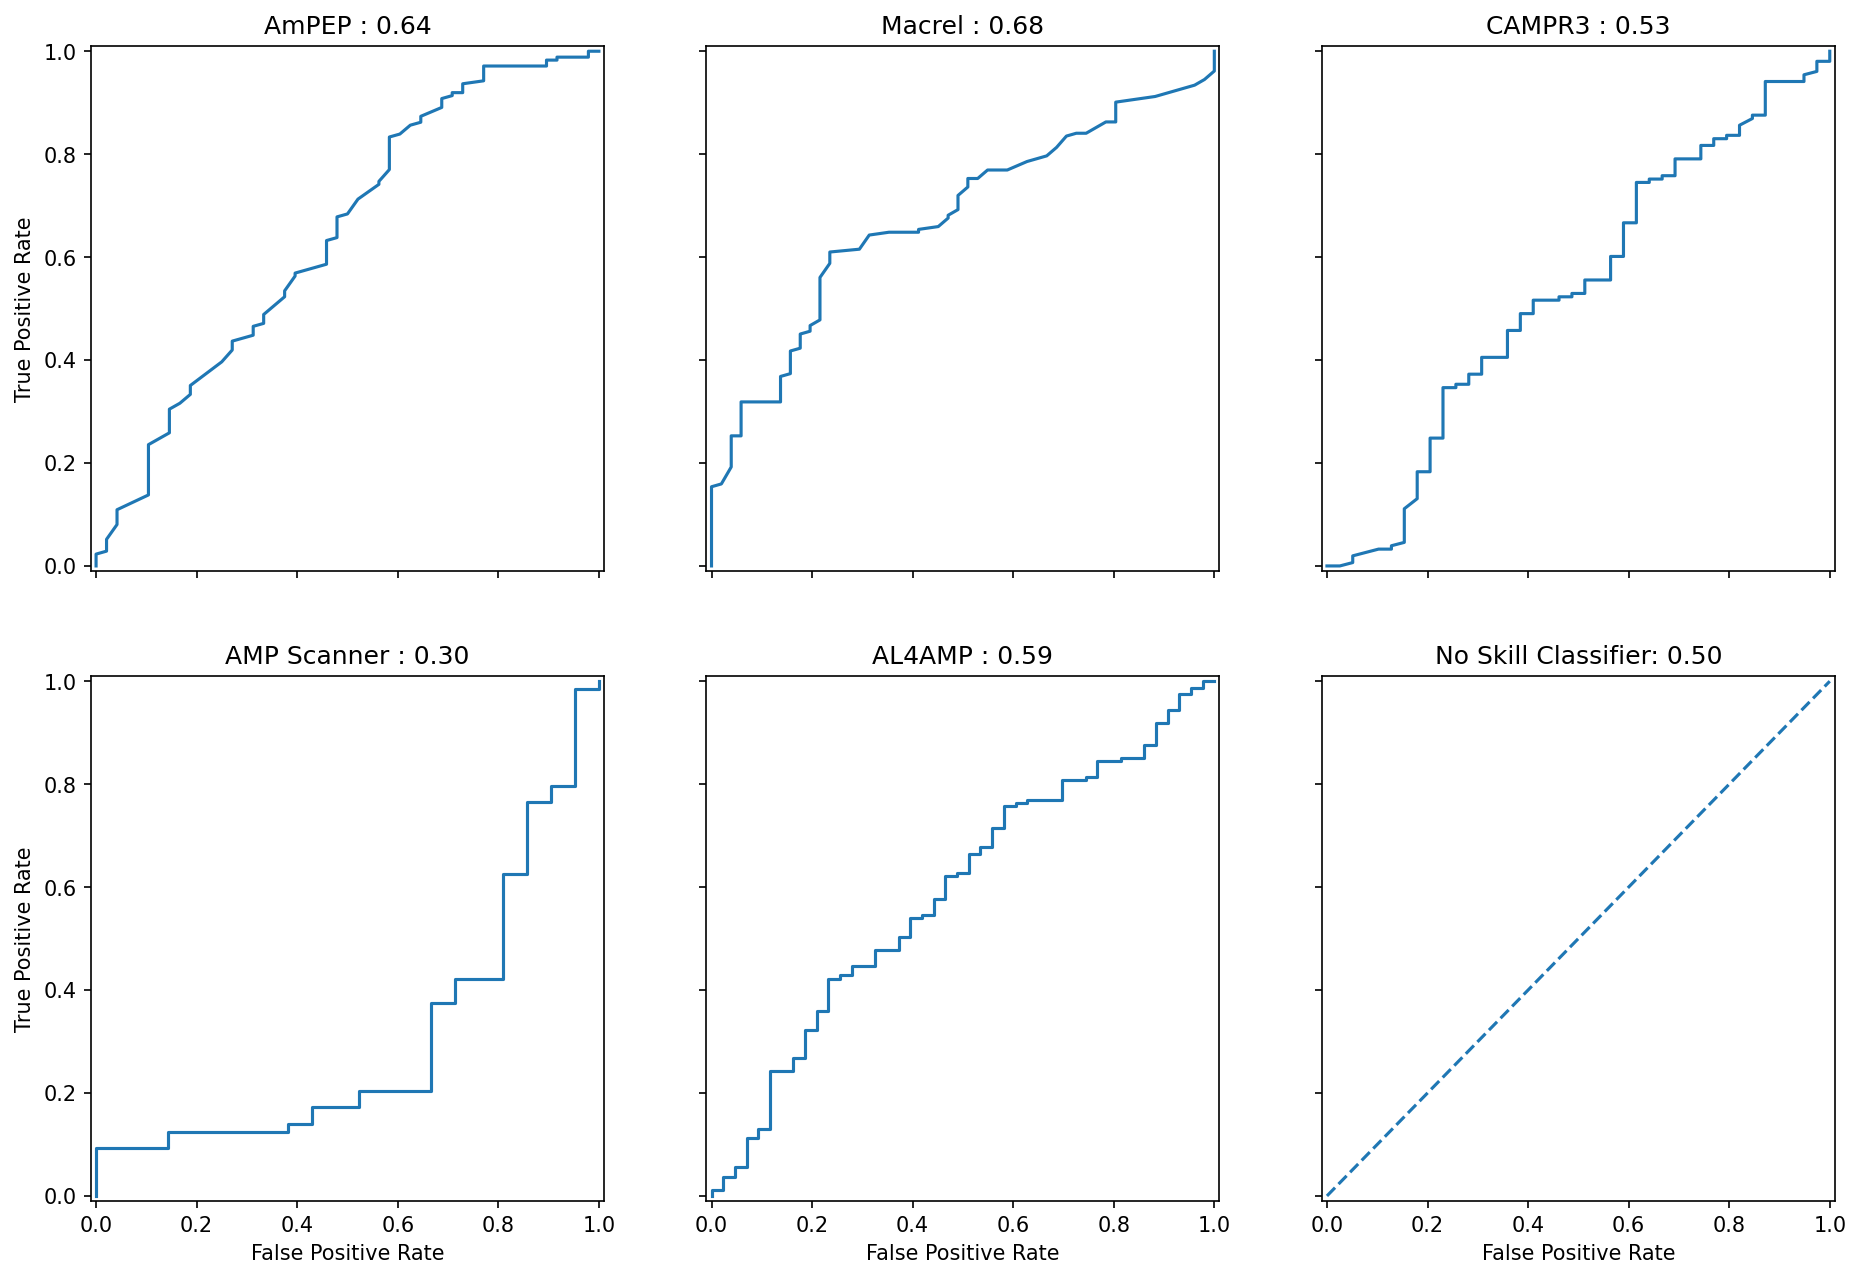

In [4]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, dpi=150, sharex=True, sharey=True, figsize=(15,10))

for name, df , ax in zip(["AmPEP", "Macrel", "CAMPR3", "AMP Scanner", "AL4AMP"], results, [ax1,ax2,ax3,ax4,ax5]):
  fpr, tpr, thresholds = roc_curve(df['True Label'], df["Score"], pos_label=1)
  roc_auc = auc(fpr,tpr)
  
  ax.set_title("{} : {:.2f}".format(name, roc_auc))
  ax.plot(fpr, tpr)
  ax.set_xlim(-0.01,1.01)
  ax.set_ylim(-0.01,1.01)

ax4.set_xlabel("False Positive Rate")
ax5.set_xlabel("False Positive Rate")
ax6.set_xlabel("False Positive Rate")

ax1.set_ylabel("True Positive Rate")
ax4.set_ylabel("True Positive Rate")

ax6.set_title("No Skill Classifier: 0.50")
ax6.plot([0,1], [0,1], "--")
plt.show()

Macrel adn AmPEP showed the best performance for RiPPs classification

### Compute PRC and its AUC for each model

In [5]:
print("Proportion of RiPPS with experimental antimicrobial activity")
for name, df in zip(["AmPEP", "Macrel", "CAMPR3", "AMP Scanner", "AL4AMP"], results):
    print("{}: {:.2f}".format(name, list(df["True Label"]).count(1)/df.shape[0]))

Proportion of RiPPS with experimental antimicrobial activity
AmPEP: 0.78
Macrel: 0.78
CAMPR3: 0.80
AMP Scanner: 0.75
AL4AMP: 0.79


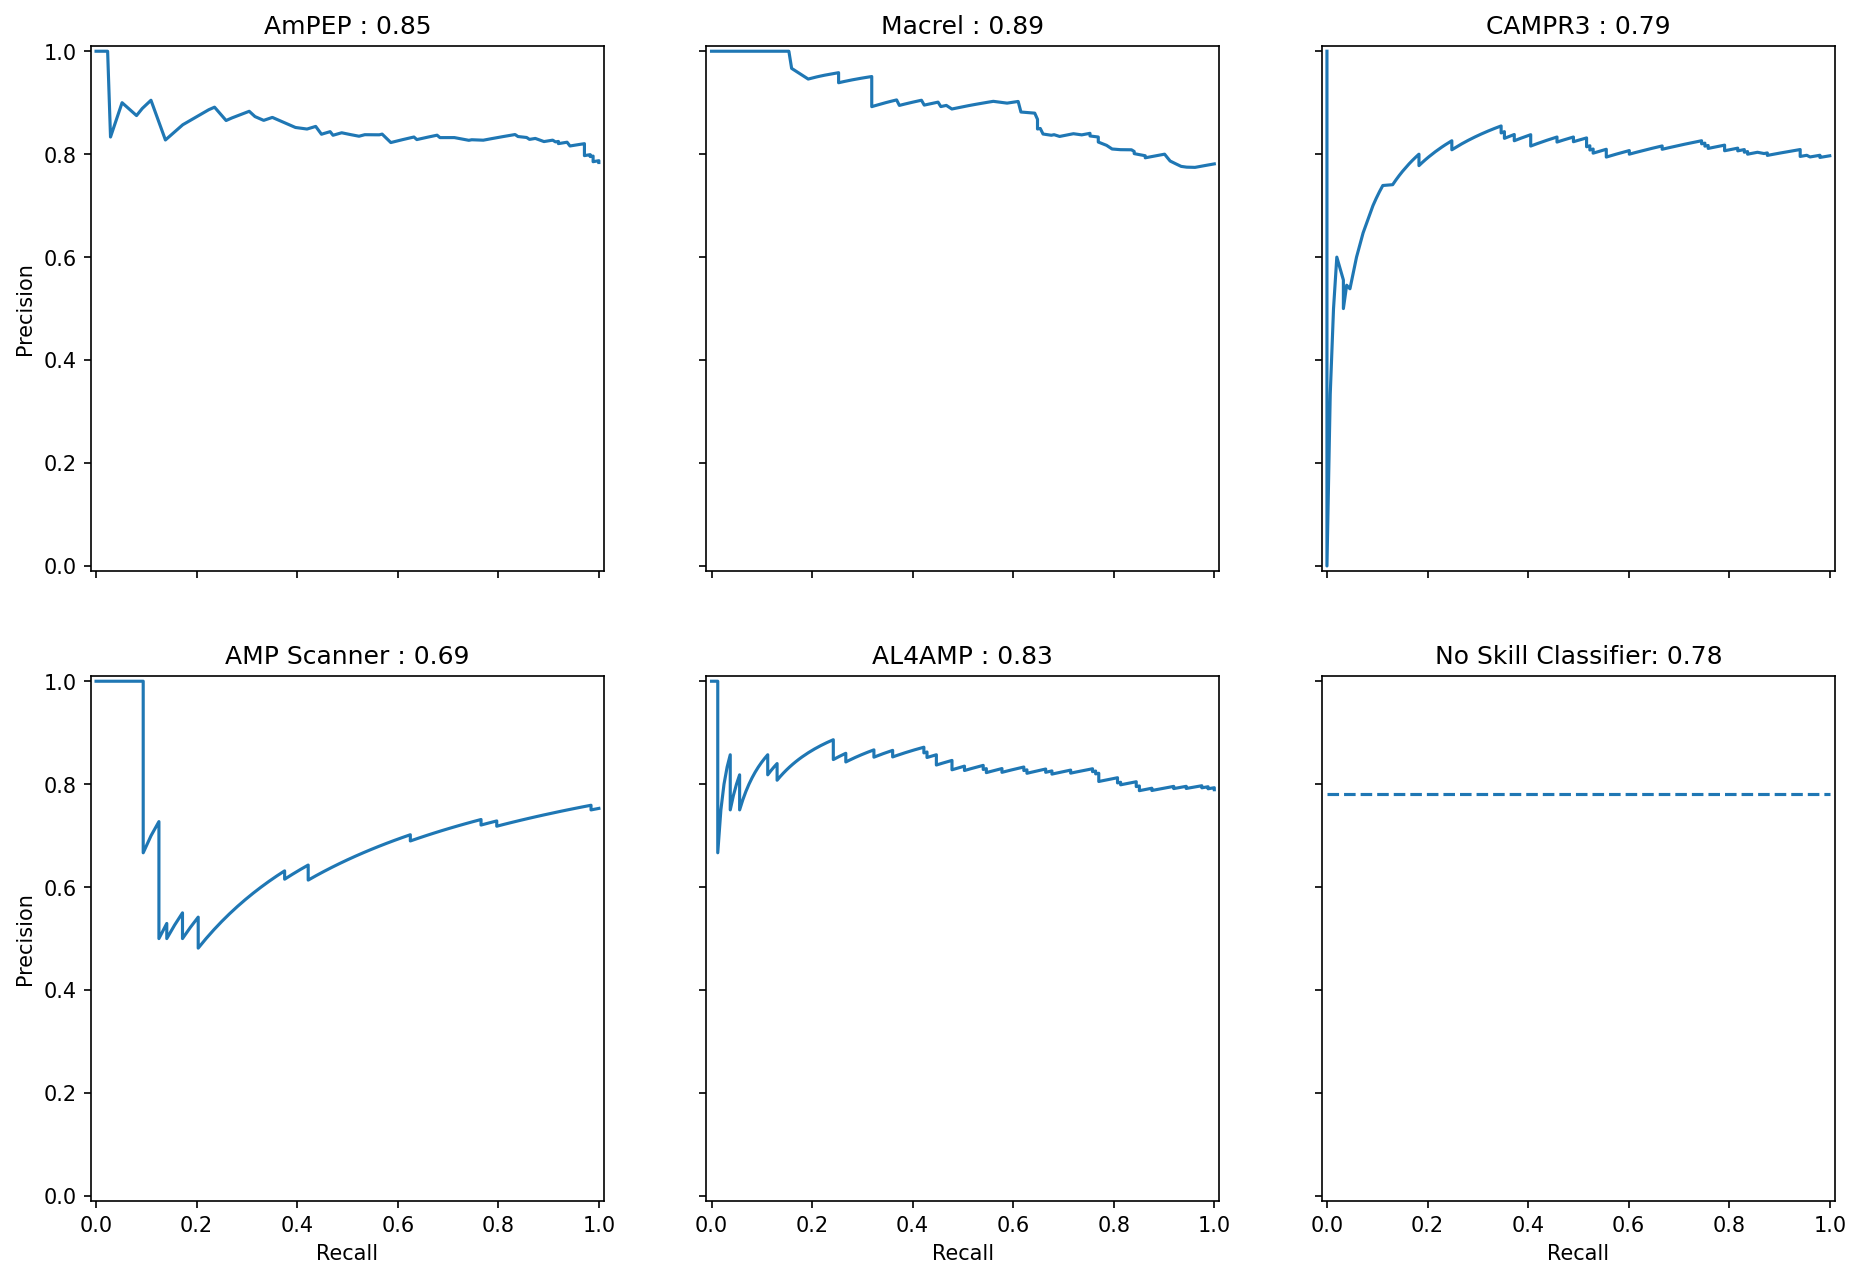

In [6]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, dpi=150, sharex=True, sharey=True, figsize=(15,10))

for name, df , ax in zip(["AmPEP", "Macrel", "CAMPR3", "AMP Scanner", "AL4AMP"], results, [ax1,ax2,ax3,ax4,ax5]):
  precision, recall, thresholds = precision_recall_curve(df['True Label'], df["Score"], pos_label=1)
  pr_auc = auc(recall, precision)
  
  ax.set_title("{} : {:.2f}".format(name, pr_auc))
  ax.plot(recall, precision)
  ax.set_xlim(-0.01,1.01)
  ax.set_ylim(-0.01,1.01)

ax6.set_title("No Skill Classifier: 0.78")
ax6.plot([0,1], [0.78,0.78], "--")

ax4.set_xlabel("Recall")
ax5.set_xlabel("Recall")
ax6.set_xlabel("Recall")

ax1.set_ylabel("Precision")
ax4.set_ylabel("Precision")
plt.show()

Macrel adn AmPEP showed the best performance for this test too

### Analyze in more detail the performace of AmPEP and Macrel

/home/norberto/.conda/envs/ripps/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/norberto/.conda/envs/ripps/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/norberto/.conda/envs/ripps/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/norberto/.conda/envs/ripps/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

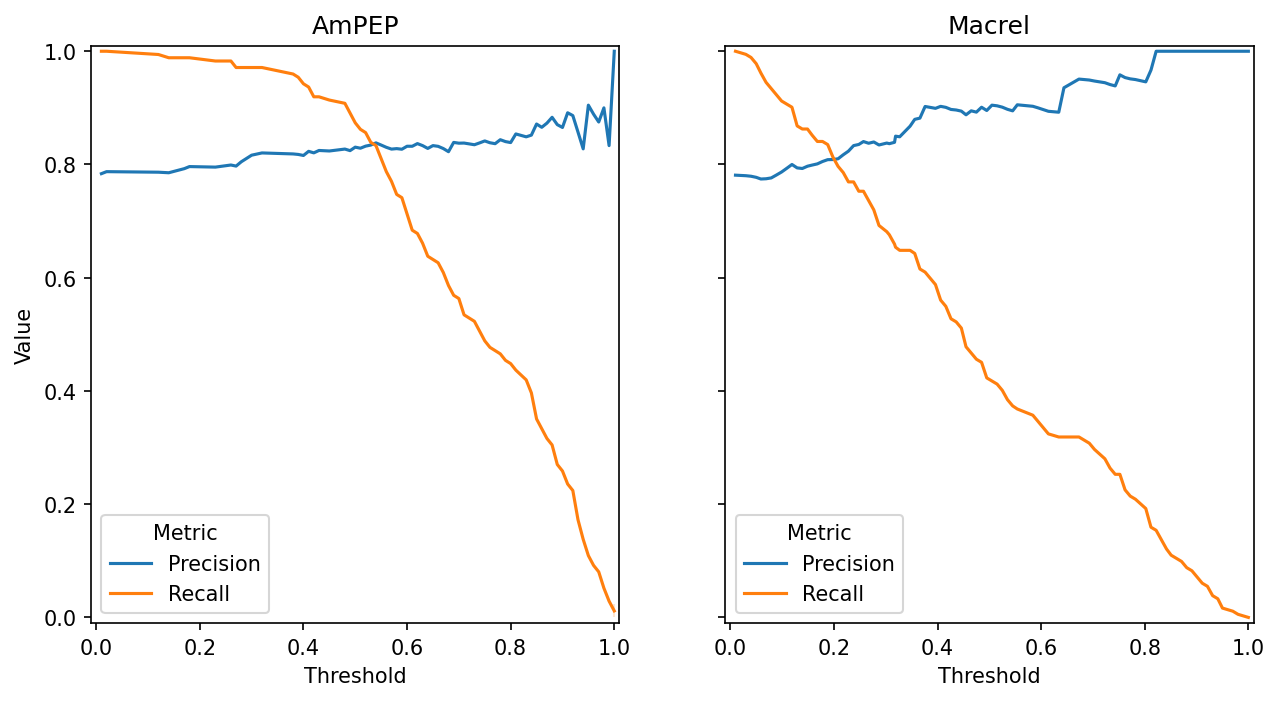

In [7]:
fig, (ax1,ax2) = plt.subplots(1,2, dpi=150, figsize=(10,5), sharey=True)

# AmPEP
precision, recall, thresholds = precision_recall_curve(results[0]['True Label'], results[0]["Score"], pos_label=1)
precision_df = pd.DataFrame({"Threshold":np.append(thresholds, [1.0]), "Value":precision, "Metric":["Precision" for i in precision]})
recall_df = pd.DataFrame({"Threshold":np.append(thresholds, [1.0]), "Value":recall, "Metric":["Recall" for i in precision]})
PR_data = pd.concat([precision_df, recall_df]).reset_index(drop=True)
sns.lineplot(x="Threshold", y="Value", data=PR_data, hue="Metric", ax=ax1)
ax1.set_title("AmPEP")
ax1.set_xlim(-0.01,1.01)
ax1.set_ylim(-0.01,1.01)


# Macrel
precision, recall, thresholds = precision_recall_curve(results[1]['True Label'], results[1]["Score"], pos_label=1)
precision_df = pd.DataFrame({"Threshold":np.append(thresholds, [1.0]), "Value":precision, "Metric":["Precision" for i in precision]})
recall_df = pd.DataFrame({"Threshold":np.append(thresholds, [1.0]), "Value":recall, "Metric":["Recall" for i in precision]})
PR_data = pd.concat([precision_df, recall_df]).reset_index(drop=True)
sns.lineplot(x="Threshold", y="Value", data=PR_data, hue="Metric", ax=ax2)
ax2.set_title("Macrel")
ax2.set_xlim(-0.01,1.01)
ax2.set_ylim(-0.01,1.01)

# ax2.plot([0.37,0.37], [0,1], "k--")

plt.show()

AmPEP showed high precision only at high threshold values (when the recall is to low)
Macrel showed a precision almost stable at 0.90 for thresholds values between 0.37 and 0.63, so the lower threshold value is prefered since it yields to the higher recall